In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
import requests
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-51.91805414682532, -143.73484827130866),
 (-65.457678673295, 154.72655246429196),
 (85.76726603402219, -143.0389988856887),
 (74.84156853894197, -61.51126994174149),
 (-64.83712202787979, -74.92670084385836),
 (9.463304507092346, -179.1070042632334),
 (-45.78835400738245, 136.0696954396853),
 (86.43534415872833, 167.45637104182373),
 (62.40705455604123, 0.24140770903775888),
 (-46.96171097950978, -161.04961874626966),
 (79.91533989308695, 127.89494267930604),
 (-27.17395031702221, -86.56640856489888),
 (-29.691713734672888, -15.638453418422102),
 (-35.38838007968908, -2.3889629066989926),
 (-21.609428069406107, 14.874793788225304),
 (-0.27705345447940033, 171.540028253919),
 (-5.243478895825973, 122.05162447194073),
 (-23.889513934292125, 99.19348977703106),
 (41.03043198652546, -2.4450929700442146),
 (71.90438157044409, -137.98359067450104),
 (-14.118827126075658, -146.13641249610995),
 (-73.8991900431582, -16.180144879757194),
 (-32.73442442736773, -20.568268110519682),
 (-26.4619

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96c59c82b0c62cd93888a34be01334d3


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | brae
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | henties bay
Processing Record 16 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 1 | katobu
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | soria
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | tiarei
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | mmabatho
Processing Record 24 

Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | baghpat
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | srednekolymsk
Processing Record 45 of Set 4 | kungurtug
Processing Record 46 of Set 4 | grand forks
Processing Record 47 of Set 4 | dharchula
Processing Record 48 of Set 4 | tingi
Processing Record 49 of Set 4 | elliot lake
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | kon tum
Processing Record 3 of Set 5 | souillac
Processing Record 4 of Set 5 | fairbanks
Processing Record 5 of Set 5 | antalaha
Processing Record 6 of Set 5 | sevilla
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | ahuimanu
Processing Record 9 of Set 5 | babanusah
City not found. Skipping...
Processing Record 10 of Set 5 | hithadhoo
Processing Record 11 of Set 5 | bilma
Processing Record 12 of S

Processing Record 27 of Set 8 | hammerfest
Processing Record 28 of Set 8 | tyulgan
Processing Record 29 of Set 8 | rio cuarto
Processing Record 30 of Set 8 | ialibu
Processing Record 31 of Set 8 | castrillon
Processing Record 32 of Set 8 | muisne
Processing Record 33 of Set 8 | ksenyevka
City not found. Skipping...
Processing Record 34 of Set 8 | yeppoon
Processing Record 35 of Set 8 | aripuana
Processing Record 36 of Set 8 | kharp
Processing Record 37 of Set 8 | singaraja
Processing Record 38 of Set 8 | acarau
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | charters towers
Processing Record 41 of Set 8 | tilichiki
Processing Record 42 of Set 8 | tual
Processing Record 43 of Set 8 | beloha
Processing Record 44 of Set 8 | flin flon
Processing Record 45 of Set 8 | hartselle
Processing Record 46 of Set 8 | sinnamary
Processing Record 47 of Set 8 | san juan
Processing Record 48 of Set 8 | faanui
Processing Record 49 of Set 8 | zyryanka
Processing Record 50 of S

Processing Record 18 of Set 12 | chilac
City not found. Skipping...
Processing Record 19 of Set 12 | cayce
Processing Record 20 of Set 12 | bargal
City not found. Skipping...
Processing Record 21 of Set 12 | hovd
Processing Record 22 of Set 12 | requena
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | morant bay
Processing Record 25 of Set 12 | ureki
Processing Record 26 of Set 12 | quelimane
Processing Record 27 of Set 12 | vao
Processing Record 28 of Set 12 | moose factory
Processing Record 29 of Set 12 | chapais
Processing Record 30 of Set 12 | kilosa
Processing Record 31 of Set 12 | pahrump
Processing Record 32 of Set 12 | lieksa
Processing Record 33 of Set 12 | mombasa
Processing Record 34 of Set 12 | guacheta
Processing Record 35 of Set 12 | hihifo
City not found. Skipping...
Processing Record 36 of Set 12 | ambulu
Processing Record 37 of Set 12 | birao
Processing Record 38 of Set 12 | jacareacanga
Processing Record 39 of Set 12 | oistins
Processing Record

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,35,NZ,2021-06-01 00:52:21,76,-46.1927,168.8643,49.48,2.93
1,Bluff,78,NZ,2021-06-01 00:52:21,74,-46.6000,168.3333,49.80,14.14
2,Tuktoyaktuk,75,CA,2021-06-01 00:52:21,86,69.4541,-133.0374,30.20,8.05
3,Upernavik,100,GL,2021-06-01 00:52:21,88,72.7868,-56.1549,30.79,3.06
4,Ushuaia,75,AR,2021-06-01 00:51:07,100,-54.8000,-68.3000,29.86,3.44


In [14]:
city_data = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_city_data]
city_data_df.head()

NameError: name 'new_city_data' is not defined

In [113]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [114]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

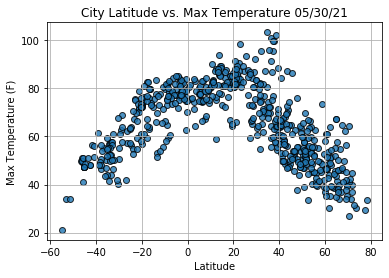

In [115]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

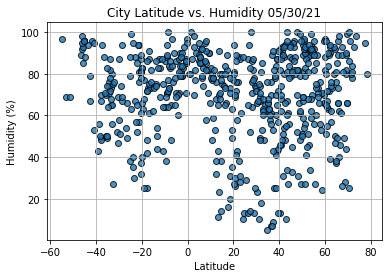

In [116]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

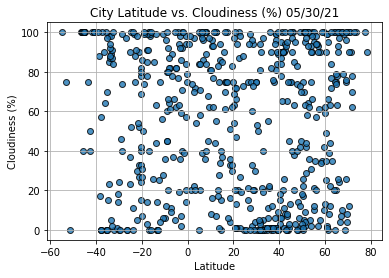

In [118]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

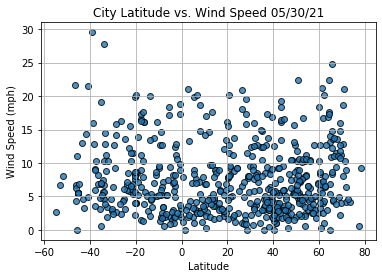

In [119]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [125]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [126]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-05-31 00:03:02
Lat                         -54.8
Lng                         -68.3
Max Temp                    21.15
Humidity                       97
Cloudiness                    100
Wind Speed                   2.64
Name: 13, dtype: object

In [132]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

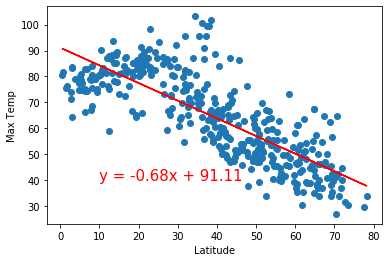

In [134]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

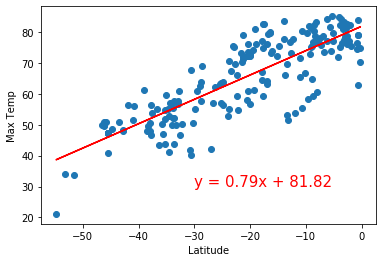

In [136]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,30))

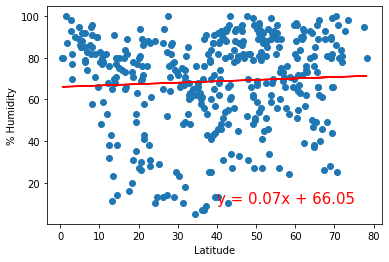

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

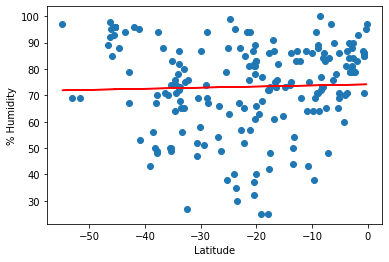

In [144]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', 
                       '% Humidity',(-50,15))

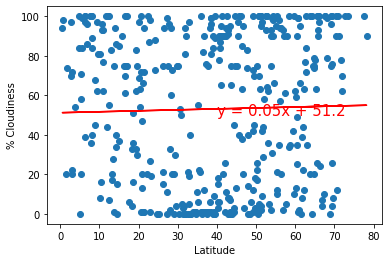

In [149]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \for % Cloudiness', 
                       '% Cloudiness',(40,50))

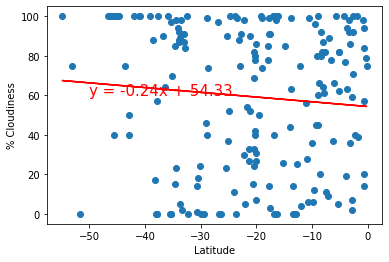

In [151]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-50,60))


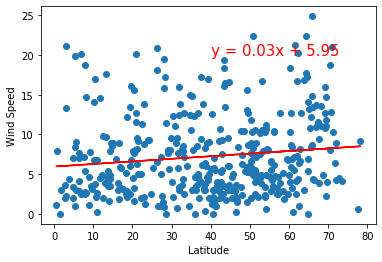

In [156]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,20))

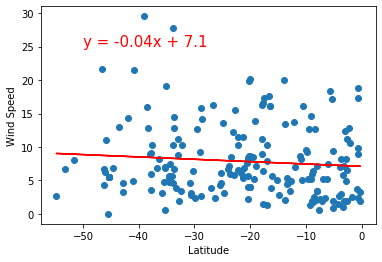

In [159]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))